Installing and importing libraries

In [1]:
!pip -q install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from ucimlrepo import fetch_ucirepo
import graphviz
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading dataset

In [3]:
mushroom = fetch_ucirepo(id=73)
X = mushroom.data.features
y = mushroom.data.targets

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (8124, 22)
Target shape: (8124, 1)


parsing dataset into dataframe, checking missing values, and target distribution

In [4]:
df = pd.concat([X, y], axis=1)

print("First 5 rows:")
print(df.head())
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTotal missing values: ")
print(df.isnull().sum().sum())

print("\nTarget Distribution:")
print(y.value_counts())

First 5 rows:
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p         

Feature analysis

In [5]:
print("Unique Values per Feature:")
for col in X.columns:
    unique_count = X[col].nunique()
    print(f"{col:25s}: {unique_count} unique values")

Unique Values per Feature:
cap-shape                : 6 unique values
cap-surface              : 4 unique values
cap-color                : 10 unique values
bruises                  : 2 unique values
odor                     : 9 unique values
gill-attachment          : 2 unique values
gill-spacing             : 2 unique values
gill-size                : 2 unique values
gill-color               : 12 unique values
stalk-shape              : 2 unique values
stalk-root               : 4 unique values
stalk-surface-above-ring : 4 unique values
stalk-surface-below-ring : 4 unique values
stalk-color-above-ring   : 9 unique values
stalk-color-below-ring   : 9 unique values
veil-type                : 1 unique values
veil-color               : 4 unique values
ring-number              : 3 unique values
ring-type                : 5 unique values
spore-print-color        : 9 unique values
population               : 6 unique values
habitat                  : 7 unique values


dropping veil-type as it has only one unique value which indicates it's a constant feature

In [6]:
X.drop('veil-type', axis=1, inplace=True)
print(f"Features shape: {X.shape}")

Features shape: (8124, 21)


handing missing values

In [7]:
for col in X.columns:
    X[col].fillna(X[col].mode()[0], inplace=True)

In [8]:
print(X.isnull().sum())
print("Total missing values: ", X.isnull().sum().sum())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Total missing values:  0


handling categoricals

In [9]:
le = LabelEncoder()

X_encoded = X.copy()
for col in X_encoded.columns:
    X_encoded[col] = le.fit_transform(X_encoded[col])

y_encoded = le.fit_transform(y.values)

print(f"Encoded X shape: {X_encoded.shape}")
print("\nFirst 5 rows of encoded features:")
print(X_encoded.head())
print(f"Encoded X shape: {y_encoded.shape}")
print("\nFirst 5 rows of encoded target:")
print(y_encoded[:5])

Encoded X shape: (8124, 21)

First 5 rows of encoded features:
   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2         

#EDA

Target Distribution barchart

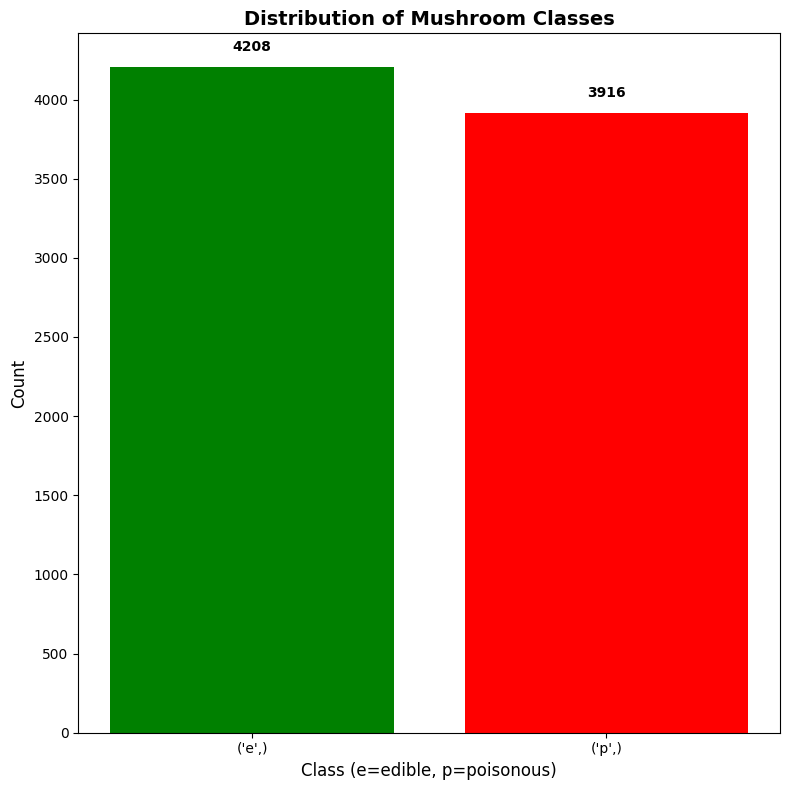

In [10]:
plt.figure(figsize=(8,8))
labels = [str(x) for x in y.value_counts().index]
plt.bar(labels, y.value_counts().values, color=['green', 'red'], alpha=1)
plt.xlabel('Class (e=edible, p=poisonous)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Mushroom Classes', fontsize=14, fontweight='bold')
for i, v in enumerate(y.value_counts().values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

feature distribution barcharts

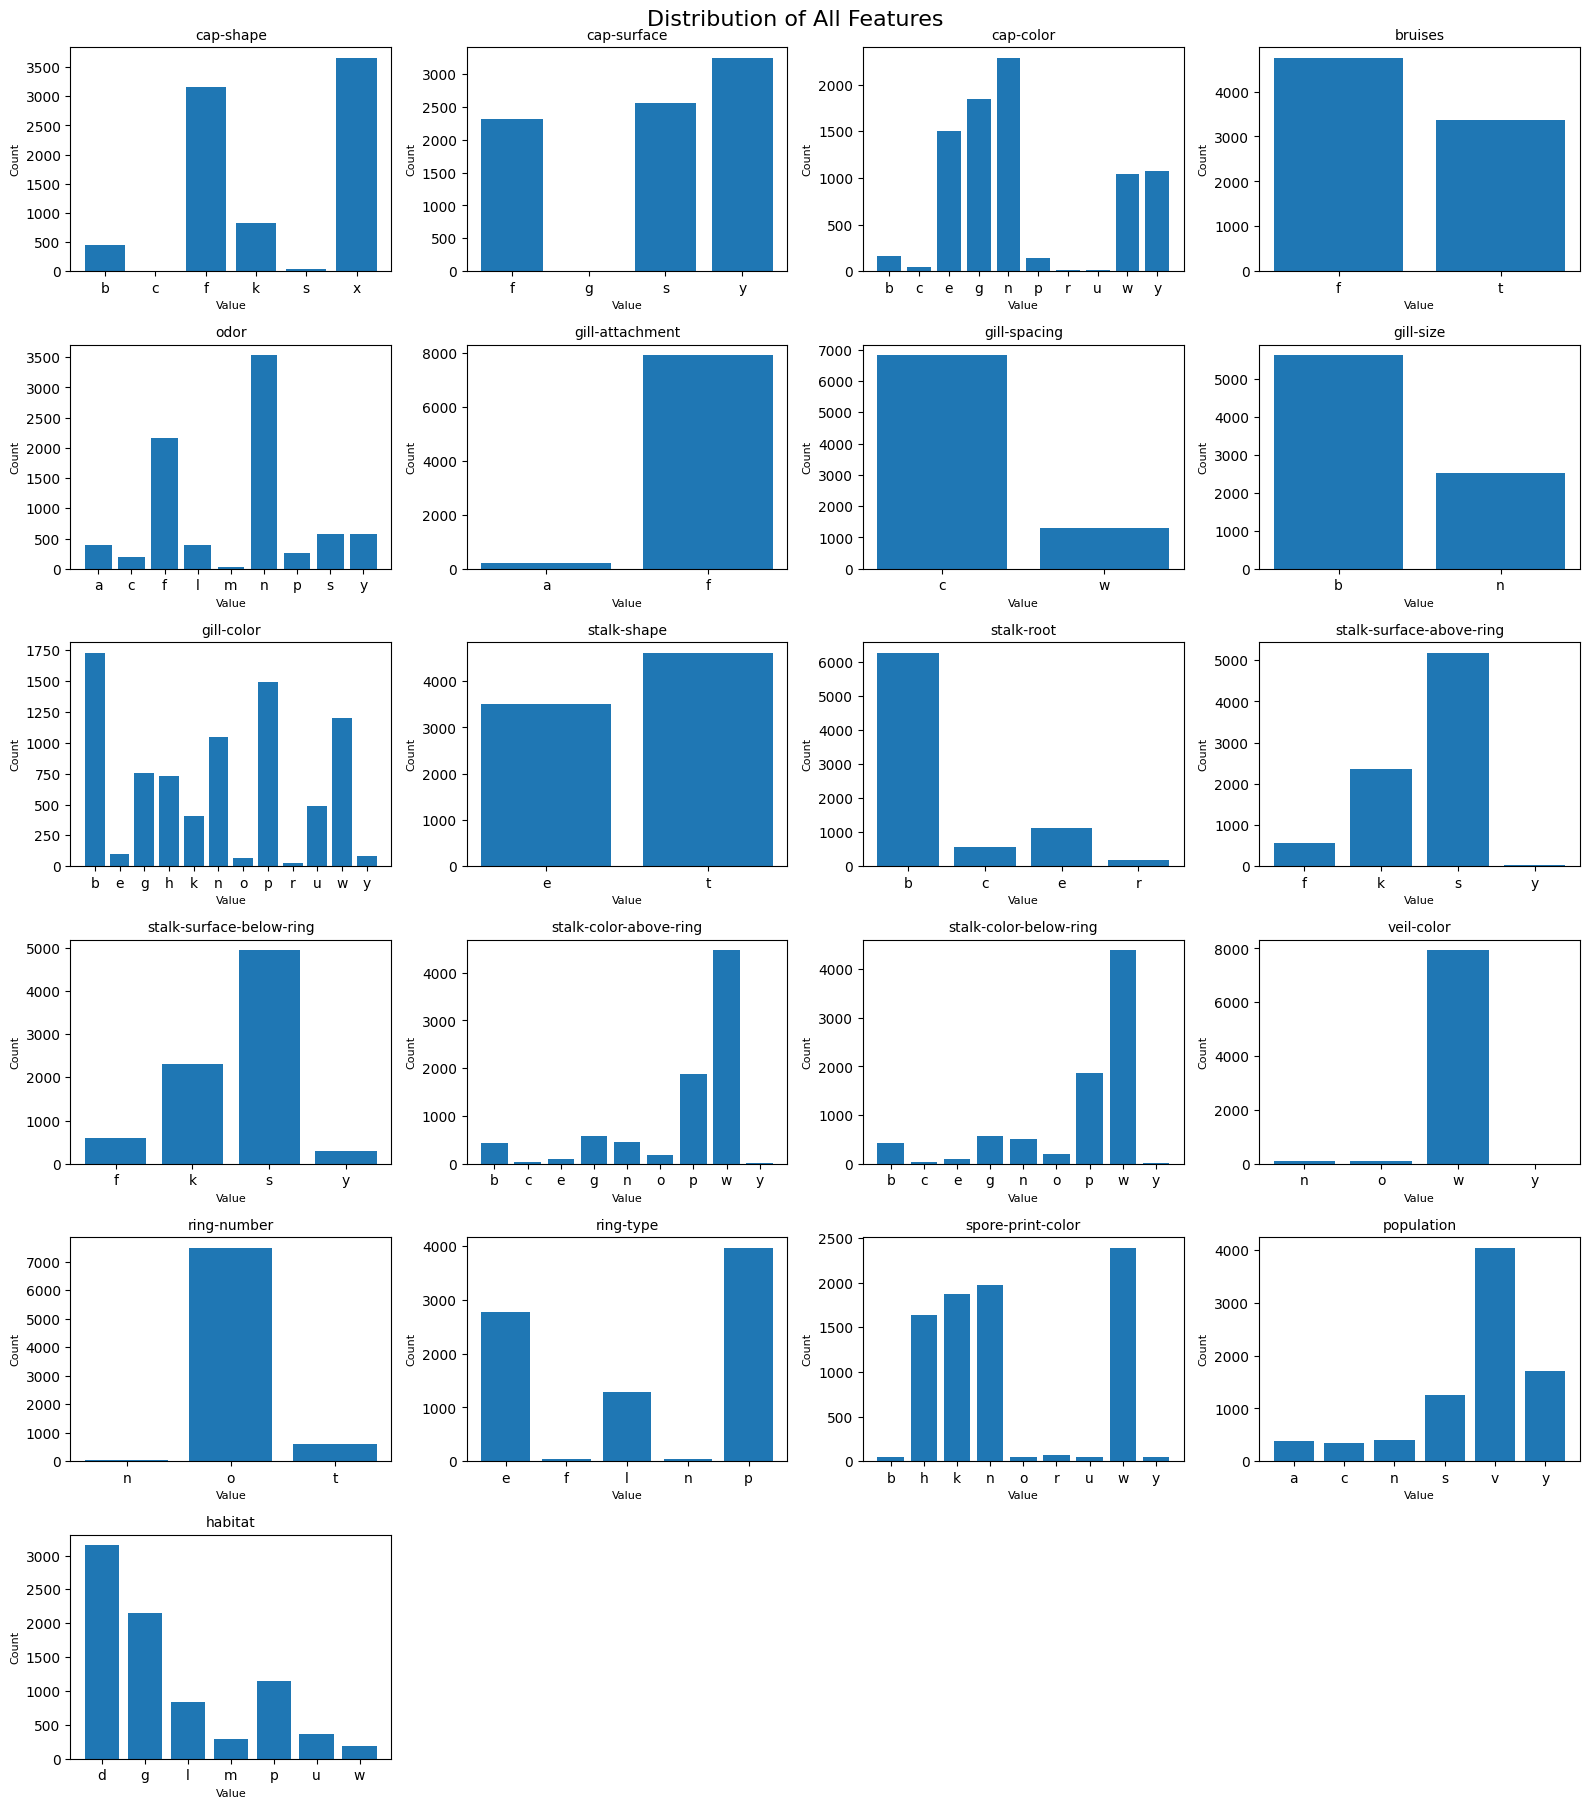

In [11]:
fig, axes = plt.subplots(6, 4, figsize=(16, 18))
axes = axes.ravel()

for idx, col in enumerate(X.columns):
    if idx < len(axes):
        value_counts = X[col].value_counts().sort_index()
        axes[idx].bar(value_counts.index, value_counts.values, alpha=1)
        axes[idx].set_title(f'{col}', fontsize=10)
        axes[idx].set_xlabel('Value', fontsize=8)
        axes[idx].set_ylabel('Count', fontsize=8)
        axes[idx].tick_params(labelsize=10)

for idx in range(len(X.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution of All Features', fontsize=16, y=1.002)
plt.show()

Correlation matrix

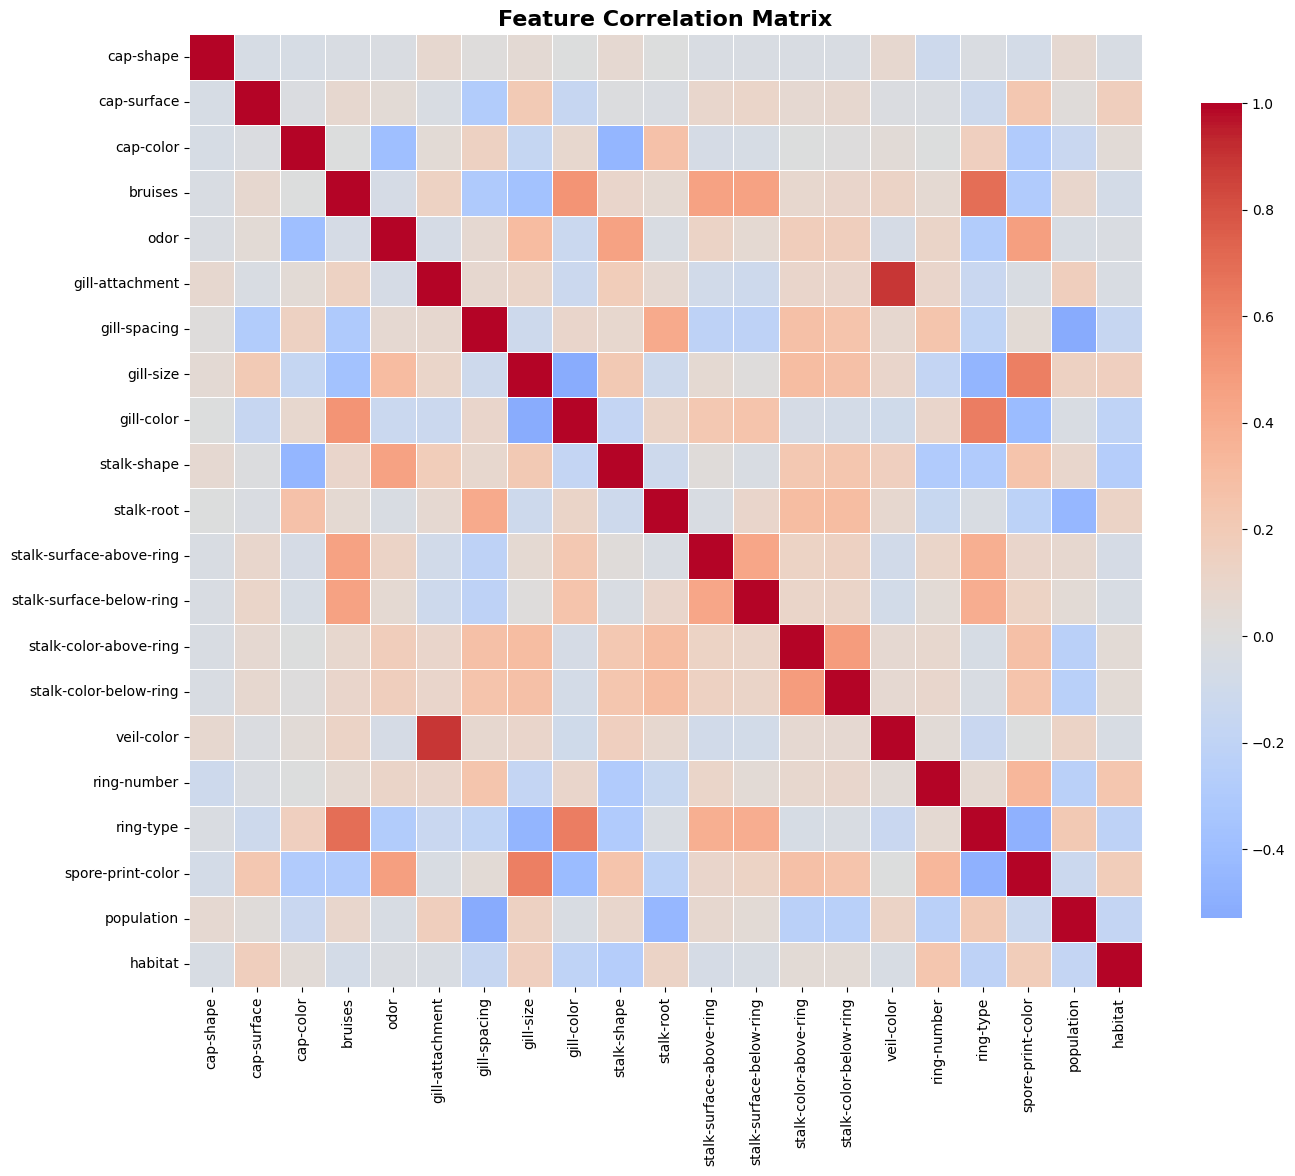

Correlation matrix shape: (21, 21)


In [12]:
correlation_matrix = X_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False,cmap='coolwarm', center=0,square=True,linewidths=0.5,cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation matrix shape:", correlation_matrix.shape)

Train-test split (80-20)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded.values,y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 6499 samples
Test set: 1625 samples


In [14]:
np.bincount(y_test)

array([842, 783])

Decision tree (manual implementation)

In [15]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def entropy(self, y):
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def information_gain(self, X_column, y, threshold):
        parent_entropy = self.entropy(y)

        left_mask = X_column <= threshold
        right_mask = X_column > threshold

        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0

        n = len(y)
        n_left, n_right = np.sum(left_mask), np.sum(right_mask)
        e_left, e_right = self.entropy(y[left_mask]), self.entropy(y[right_mask])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None

        n_features = X.shape[1]


        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)

            for threshold in thresholds:
                gain = self.information_gain(X_column, y, threshold)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain


    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1 or n_samples < self.min_samples_split:
            leaf_value = self.most_common_label(y)
            return Node(value=leaf_value)


        best_feature, best_threshold, best_gain = self.best_split(X, y)

        if best_gain == 0:
            leaf_value = self.most_common_label(y)
            return Node(value=leaf_value)

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold

        left_child = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return Node(best_feature, best_threshold, left_child, right_child)

    def most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def fit(self, X, y):
        self.root = self.build_tree(X, y)
        return self

    def predict_sample(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature] <= node.threshold:
            return self.predict_sample(x, node.left)
        else:
            return self.predict_sample(x, node.right)

    def predict(self, X):
        return np.array([self.predict_sample(x, self.root) for x in X])


Training decision tree

In [16]:
dt_manual = DecisionTree(max_depth=10, min_samples_split=2)
dt_manual.fit(X_train, y_train)

y_pred_dt = dt_manual.predict(X_test)

dt_accuracy = np.mean(y_pred_dt == y_test)

print(f"Accuracy: {dt_accuracy * 100:.2f}%")
print("\n", classification_report(y_test, y_pred_dt, target_names=['Edible', 'Poisonous']))

Accuracy: 100.00%

               precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Decision tree visualization

['digraph Tree {', '0 [label="gill-color\\n<=0.0"]', '1 [label="poisonous" color=Red]', '0->1', '2 [label="spore-print-color\\n<=1.0"]', '0->2', '3 [label="odor\\n<=2.0"]', '2->3', '4 [label="poisonous" color=Red]', '3->4', '5 [label="edible" color=Green]', '3->5', '6 [label="gill-size\\n<=0.0"]', '2->6', '7 [label="spore-print-color\\n<=4.0"]', '6->7', '8 [label="edible" color=Green]', '7->8', '9 [label="spore-print-color\\n<=5.0"]', '7->9', '10 [label="poisonous" color=Red]', '9->10', '11 [label="odor\\n<=4.0"]', '9->11', '12 [label="poisonous" color=Red]', '11->12', '13 [label="edible" color=Green]', '11->13', '14 [label="odor\\n<=5.0"]', '6->14', '15 [label="odor\\n<=1.0"]', '14->15', '16 [label="bruises\\n<=0.0"]', '15->16', '17 [label="poisonous" color=Red]', '16->17', '18 [label="edible" color=Green]', '16->18', '19 [label="stalk-surface-below-ring\\n<=2.0"]', '15->19', '20 [label="population\\n<=1.0"]', '19->20', '21 [label="poisonous" color=Red]', '20->21', '22 [label="edible"

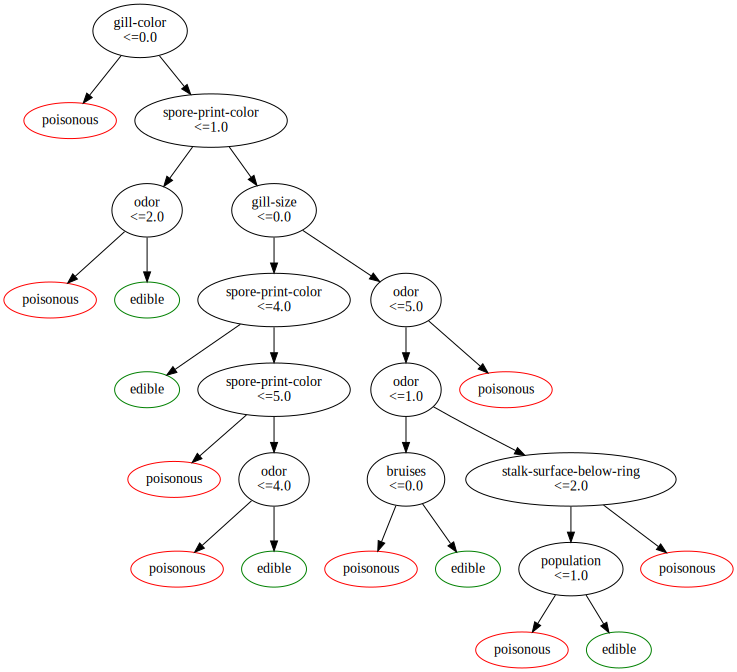

In [17]:
def viz_tree(node, names=None):
    dot = ["digraph Tree {"]
    c = [0]
    def add(n, p=None):
        i = c[0]; c[0] += 1
        if n.is_leaf():
            val= "edible" if n.value == 0 else "poisonous"
            mark= "Green" if n.value == 0 else "Red"
            dot.append(f'{i} [label="{val}" color={mark}]')
        else:
            f = names[n.feature] if names else f"F{n.feature}"
            dot.append(f'{i} [label="{f}\\n<={n.threshold:.1f}"]')
        if p is not None: dot.append(f'{p}->{i}')
        if not n.is_leaf(): add(n.left, i); add(n.right, i)
    add(node)
    dot.append("}")
    print(dot)
    return graphviz.Source("\n".join(dot))

viz_tree(dt_manual.root, X_encoded.columns.tolist())

Confusion matrix (decision tree)

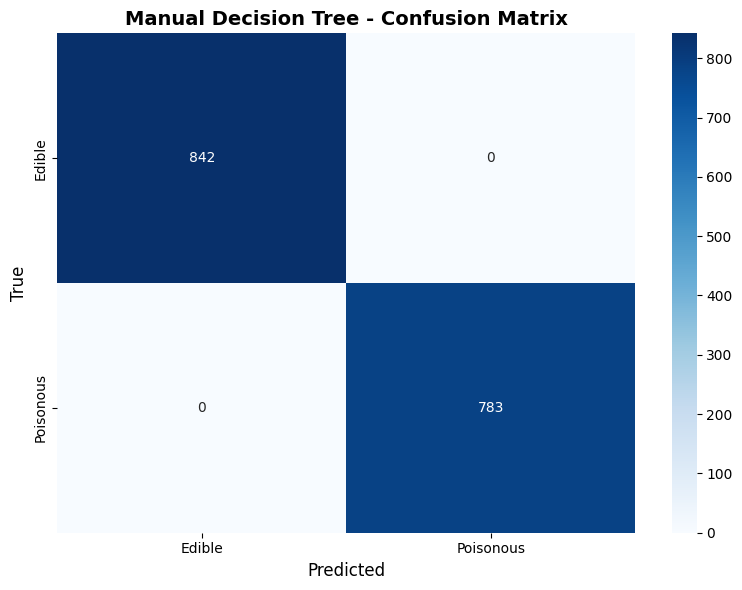


Confusion Matrix:
[[842   0]
 [  0 783]]


In [18]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Manual Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm_dt)

Random Forest (Manual implementation)

In [19]:
class RandomForest:
    def __init__(self, n_estimators=1, max_depth=None, min_samples_split=2,
                 max_features=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.trees = []

        for i in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)

            tree = DecisionTree(max_depth=self.max_depth,min_samples_split=self.min_samples_split)

            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

            if (i + 1) % 50 == 0:
                print(f"Trained {i + 1}/{self.n_estimators} trees")

        return self

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])

        predictions = []
        for i in range(X.shape[0]):
            votes = tree_predictions[:, i]
            majority_vote = Counter(votes).most_common(1)[0][0]
            predictions.append(majority_vote)

        return np.array(predictions)

Testing different n_estimators

In [20]:
n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_results = []

for i in n_estimators_list:
    print(f"\nTraining with n_estimators={i}")

    rf_model = RandomForest(n_estimators=i,max_depth=10,min_samples_split=2,random_state=42)

    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    accuracy = np.mean(y_pred_rf == y_test)
    rf_results.append({'n_estimators': i, 'accuracy': accuracy})

    print(f"n_estimators = {i:3d}, Accuracy = {accuracy * 100:.4f}%")

rf_results_df = pd.DataFrame(rf_results)

print("summary:")
print(rf_results_df)


Training with n_estimators=1
n_estimators =   1, Accuracy = 100.0000%

Training with n_estimators=50
Trained 50/50 trees
n_estimators =  50, Accuracy = 100.0000%

Training with n_estimators=100
Trained 50/100 trees
Trained 100/100 trees
n_estimators = 100, Accuracy = 100.0000%

Training with n_estimators=150
Trained 50/150 trees
Trained 100/150 trees
Trained 150/150 trees
n_estimators = 150, Accuracy = 100.0000%

Training with n_estimators=200
Trained 50/200 trees
Trained 100/200 trees
Trained 150/200 trees
Trained 200/200 trees
n_estimators = 200, Accuracy = 100.0000%

Training with n_estimators=250
Trained 50/250 trees
Trained 100/250 trees
Trained 150/250 trees
Trained 200/250 trees
Trained 250/250 trees
n_estimators = 250, Accuracy = 100.0000%
summary:
   n_estimators  accuracy
0             1       1.0
1            50       1.0
2           100       1.0
3           150       1.0
4           200       1.0
5           250       1.0


accuracy vs n_estimators plot

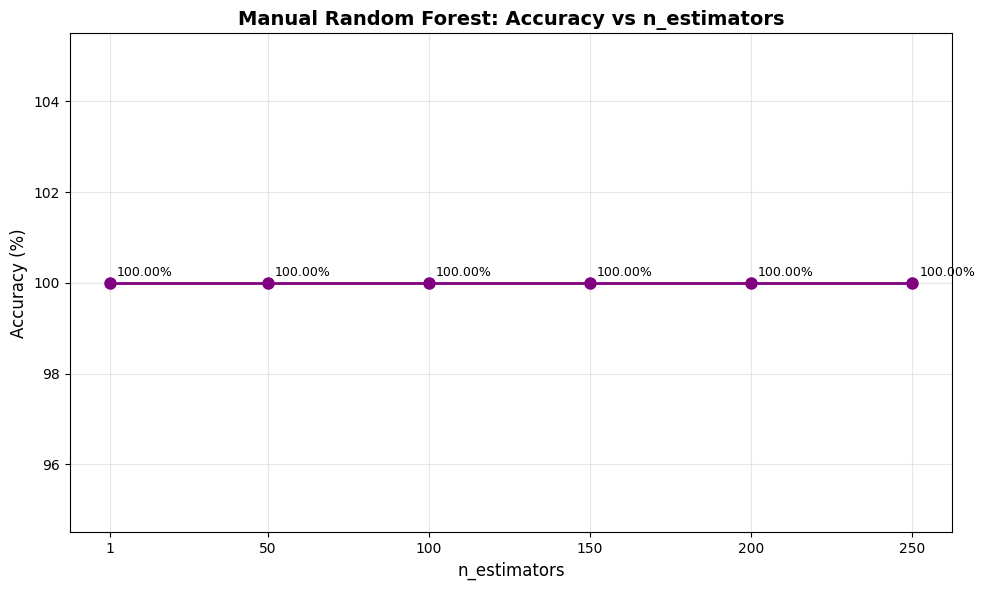

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(rf_results_df['n_estimators'], rf_results_df['accuracy'] * 100,marker='o', linewidth=2, markersize=8, color='purple')

plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Manual Random Forest: Accuracy vs n_estimators', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.xticks(n_estimators_list)

for idx, row in rf_results_df.iterrows():
    plt.annotate(f"{row['accuracy']*100:.2f}%",xy=(row['n_estimators'], row['accuracy']*100),xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

Choosing the best n_estimator

In [22]:
best_idx = rf_results_df['accuracy'].idxmax()
best_n_est = int(rf_results_df.loc[best_idx, 'n_estimators'])
best_accuracy = rf_results_df.loc[best_idx, 'accuracy']


print(f"Best n_estimators: {best_n_est}")
print(f"Best Accuracy: {best_accuracy * 100:.4f}%")

print(f"\nTraining final Random Forest with n_estimators={best_n_est}")
rf_best = RandomForest(n_estimators=best_n_est, max_depth=10,min_samples_split=2, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)

Best n_estimators: 1
Best Accuracy: 100.0000%

Training final Random Forest with n_estimators=1


Confusion matrix for random forest

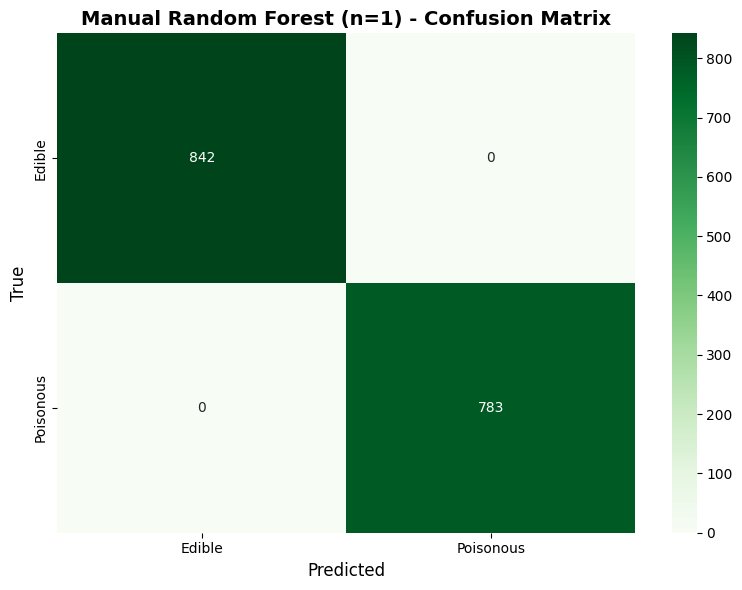

Confusion Matrix:
[[842   0]
 [  0 783]]


In [23]:
cm_rf = confusion_matrix(y_test, y_pred_rf_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title(f'Manual Random Forest (n={best_n_est}) - Confusion Matrix',fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(cm_rf)

accuarcy comparison of random forest and decision tree

In [24]:
comparison_df = pd.DataFrame({'Model': ['Decision Tree (Manual)', 'Random Forest (Manual)'],'Accuracy (%)': [dt_accuracy * 100, best_accuracy * 100],'Parameters': ['max_depth=10', f'n_estimators={best_n_est}, max_depth=10']})

print(comparison_df.to_string(index=False))

                 Model  Accuracy (%)                   Parameters
Decision Tree (Manual)         100.0                 max_depth=10
Random Forest (Manual)         100.0 n_estimators=1, max_depth=10


accuracy comparison plot

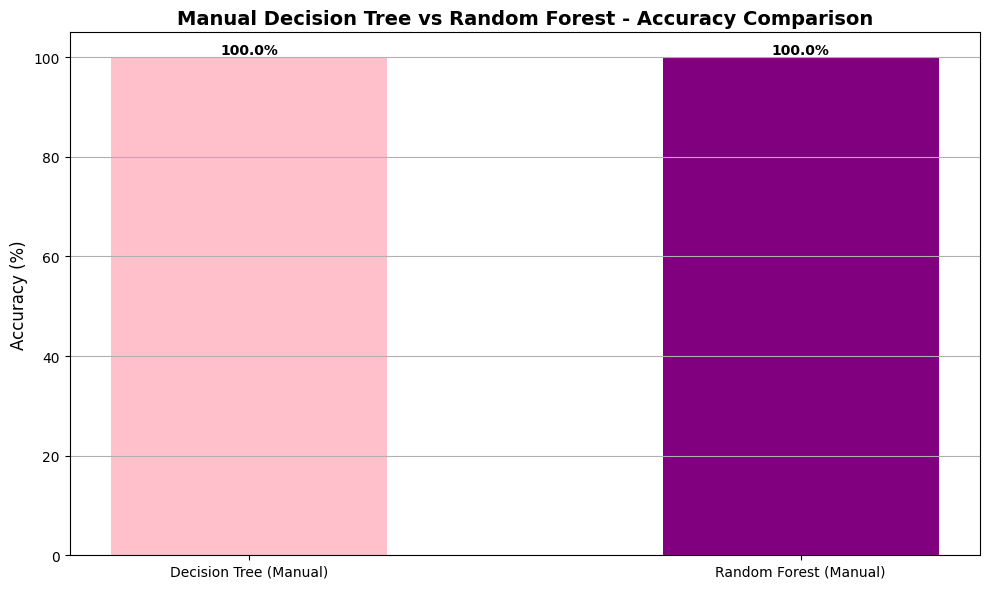

In [25]:
plt.figure(figsize=(10, 6))
colors = ['pink', 'purple']
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy (%)'],color=colors, alpha=1, width=0.5)

plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Manual Decision Tree vs Random Forest - Accuracy Comparison',fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=1)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,f'{height}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

side by side comparison of confusion matrix

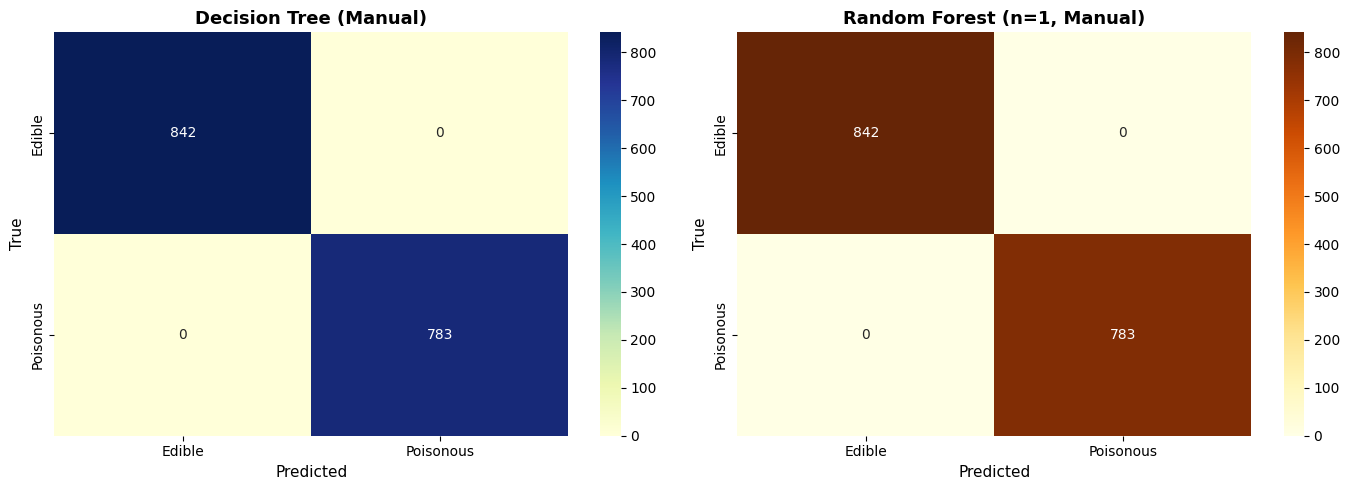

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0],xticklabels=['Edible', 'Poisonous'],yticklabels=['Edible', 'Poisonous'])
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('True', fontsize=11)
axes[0].set_title('Decision Tree (Manual)', fontsize=13, fontweight='bold')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlOrBr', ax=axes[1],xticklabels=['Edible', 'Poisonous'],yticklabels=['Edible', 'Poisonous'])

axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('True', fontsize=11)
axes[1].set_title(f'Random Forest (n={best_n_est}, Manual)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()